In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from google.colab.patches import cv2_imshow
from google.colab import drive

import requests
import datetime

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import datasets, layers, models, losses, Model

%matplotlib inline

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
dataset_path = "./drive/MyDrive/BootSandal/"

In [ ]:
target_size = (136, 102)
batch_size  = 32
class_mode_type   = "binary"
train_dir        = "./drive/MyDrive/BootSandal/train/"
test_dir      = "./drive/MyDrive/BootSandal/test/"

In [ ]:
train = ImageDataGenerator(rescale = 1/255) 
test  = ImageDataGenerator(rescale = 1/255)

train_dataset = train.flow_from_directory(train_dir,
                                          target_size = target_size,
                                          batch_size  = batch_size,
                                          class_mode  = class_mode_type)

test_dataset = test.flow_from_directory(test_dir,
                                        target_size = target_size,
                                        batch_size  = batch_size,
                                        class_mode  = class_mode_type)

Found 804 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [ ]:
CNN_Model = keras.Sequential()

CNN_Model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (136, 102, 3))) # input shape same as image shape
CNN_Model.add(keras.layers.MaxPool2D(2,2))

CNN_Model.add(keras.layers.Conv2D(64, (3,3), activation = 'relu'))
CNN_Model.add(keras.layers.MaxPool2D(2,2))

CNN_Model.add(keras.layers.Conv2D(128, (3,3), activation = 'relu'))
CNN_Model.add(keras.layers.MaxPool2D(2,2))

CNN_Model.add(keras.layers.Conv2D(128, (3,3), activation = 'relu'))
CNN_Model.add(keras.layers.MaxPool2D(2,2))

CNN_Model.add(keras.layers.Flatten()) 

CNN_Model.add(keras.layers.Dense(512, activation = 'relu'))
CNN_Model.add(keras.layers.Dense(1, activation = 'sigmoid')) 

In [ ]:
CNN_Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
r = CNN_Model.fit(train_dataset, epochs = 10, validation_data = test_dataset)

Epoch 1/10
26/26 [==============================] - 2s 68ms/step - loss: 3.0782e-06 - accuracy: 1.0000 - val_loss: 4.1947e-04 - val_accuracy: 1.0000
Epoch 2/10
26/26 [==============================] - 2s 72ms/step - loss: 2.9107e-06 - accuracy: 1.0000 - val_loss: 3.7030e-04 - val_accuracy: 1.0000
Epoch 3/10
26/26 [==============================] - 2s 82ms/step - loss: 2.7570e-06 - accuracy: 1.0000 - val_loss: 3.6758e-04 - val_accuracy: 1.0000
Epoch 4/10
26/26 [==============================] - 2s 72ms/step - loss: 2.6902e-06 - accuracy: 1.0000 - val_loss: 3.9237e-04 - val_accuracy: 1.0000
Epoch 5/10
26/26 [==============================] - 2s 65ms/step - loss: 2.5902e-06 - accuracy: 1.0000 - val_loss: 3.5968e-04 - val_accuracy: 1.0000
Epoch 6/10
26/26 [==============================] - 2s 65ms/step - loss: 2.4825e-06 - accuracy: 1.0000 - val_loss: 4.0706e-04 - val_accuracy: 1.0000
Epoch 7/10
26/26 [==============================] - 2s 65ms/step - loss: 2.3924e-06 - accuracy: 1.0000 - v

In [ ]:
CNN_Model.evaluate(test_dataset)

3/3 [==============================] - 0s 58ms/step - loss: 3.5514e-04 - accuracy: 1.0000


[0.0003551409172359854, 1.0]

In [ ]:
CNN_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 134, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 67, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 48, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 22, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 11, 128)      0

In [ ]:
y_pred = np.round(CNN_Model.predict(test.flow_from_directory(test_dir,
                                                         target_size  = target_size,
                                                         batch_size   = batch_size, 
                                                         shuffle      = False, # shuffle false so that it's in the same order as the labels
                                                         class_mode   = class_mode_type))) # binary classification

Found 96 images belonging to 2 classes.
3/3 [==============================] - 0s 53ms/step


In [ ]:
print(classification_report(test_dataset.labels, y_pred)) # classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        48

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



In [ ]:
def confusion(y_test,y_test_pred,X):
    names = ['boot','sandal']

    cm = confusion_matrix(y_test, y_test_pred)
    
    f,ax = plt.subplots(figsize = (10,10))

    sns.heatmap(cm,annot = True,linewidth =.5, linecolor = "r",fmt = ".0f",ax = ax)

    plt.title(X, size = 25)

    plt.xlabel("y_pred")
    plt.ylabel("y_true")

    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

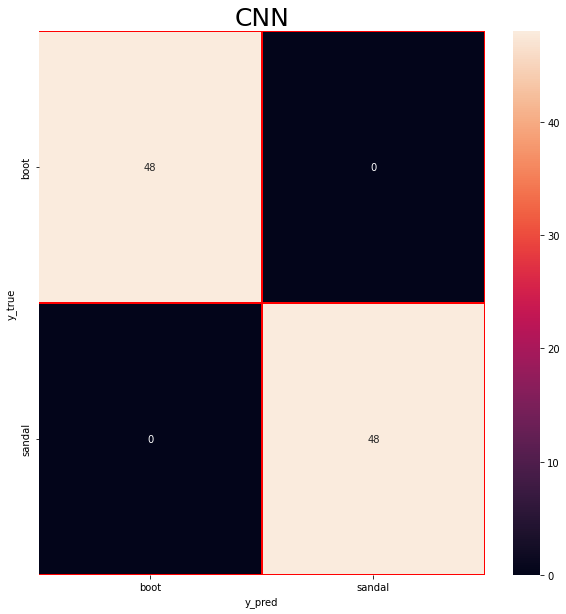

None


In [ ]:
print(confusion(test_dataset.labels, y_pred, "CNN")) 

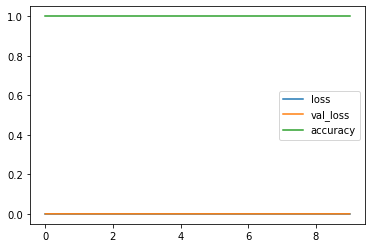

In [ ]:
# plot losses and accuracy
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

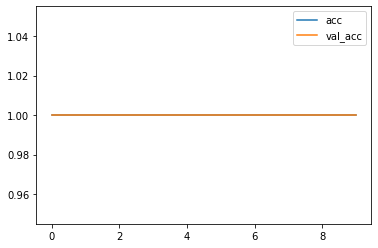

In [ ]:
# plot training and validation accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
test_dataset.class_indices

{'boot': 0, 'sandal': 1}

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename, target_size = target_size)
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y, axis = 0)
    val = CNN_Model.predict(X)
    print(val)
    if val == 0:
      plt.xlabel("boot", fontsize = 30)
    elif val == 1:
      plt.xlabel("sandal", fontsize = 30)

1/1 [==============================] - 0s 170ms/step
[[0.]]


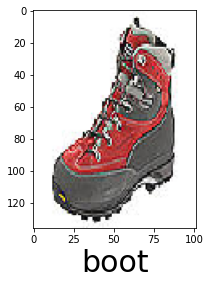

In [ ]:
predictImage(test_dir + "/boot/boot (416).jpg")

1/1 [==============================] - 0s 14ms/step
[[1.]]


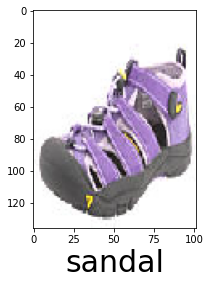

In [ ]:
predictImage(test_dir + "/sandal/Sandal (416).jpg")

1/1 [==============================] - 0s 17ms/step
[[0.]]


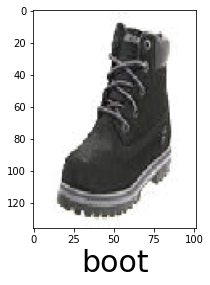

In [ ]:
predictImage(test_dir + "/boot/boot (410).jpg")

1/1 [==============================] - 0s 15ms/step
[[1.]]


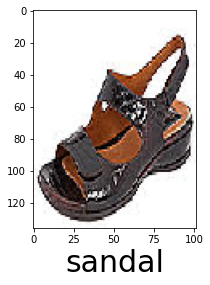

In [ ]:
predictImage(test_dir + "/sandal/Sandal (428).jpg")

***Data Augmentation***

In [ ]:
train = ImageDataGenerator(
    rescale             = 1/255,
    rotation_range      = 30,
    width_shift_range   = 0.3,
    height_shift_range  = 0.3,
    shear_range         = 0.3,
    zoom_range          = 0.3,
    horizontal_flip     = True,
    fill_mode           = 'nearest')

test = ImageDataGenerator(rescale = 1/255) 

train_dataset = train.flow_from_directory(train_dir,
                                          target_size = target_size,
                                          batch_size  = batch_size,
                                          class_mode  = class_mode_type)

test_dataset = test.flow_from_directory(test_dir,
                                        target_size = target_size,
                                        batch_size  = batch_size,
                                        class_mode  = class_mode_type)

Found 804 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [ ]:
CNN_Model = keras.Sequential()

CNN_Model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (136, 102, 3))) # input shape same as the image shape
CNN_Model.add(keras.layers.MaxPool2D(2,2))

CNN_Model.add(keras.layers.Conv2D(64, (3,3), activation = 'relu'))
CNN_Model.add(keras.layers.MaxPool2D(2,2))

CNN_Model.add(keras.layers.Conv2D(128, (3,3), activation = 'relu'))
CNN_Model.add(keras.layers.MaxPool2D(2,2))

CNN_Model.add(keras.layers.Conv2D(128, (3,3), activation = 'relu'))
CNN_Model.add(keras.layers.MaxPool2D(2,2))

CNN_Model.add(keras.layers.Flatten()) 

CNN_Model.add(keras.layers.Dense(512, activation = 'relu'))
CNN_Model.add(keras.layers.Dense(1, activation = 'sigmoid')) 

In [ ]:
CNN_Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
r = CNN_Model.fit(train_dataset, epochs = 20, validation_data = test_dataset)

Epoch 1/20
26/26 [==============================] - 5s 160ms/step - loss: 0.6905 - accuracy: 0.5299 - val_loss: 0.6564 - val_accuracy: 0.7604
Epoch 2/20
26/26 [==============================] - 4s 152ms/step - loss: 0.6207 - accuracy: 0.7040 - val_loss: 0.4035 - val_accuracy: 0.9062
Epoch 3/20
26/26 [==============================] - 4s 152ms/step - loss: 0.5801 - accuracy: 0.7251 - val_loss: 0.4623 - val_accuracy: 0.8750
Epoch 4/20
26/26 [==============================] - 4s 151ms/step - loss: 0.5330 - accuracy: 0.7400 - val_loss: 0.2488 - val_accuracy: 0.9271
Epoch 5/20
26/26 [==============================] - 4s 150ms/step - loss: 0.5054 - accuracy: 0.7488 - val_loss: 0.4076 - val_accuracy: 0.7708
Epoch 6/20
26/26 [==============================] - 4s 153ms/step - loss: 0.4201 - accuracy: 0.8147 - val_loss: 0.1544 - val_accuracy: 0.9583
Epoch 7/20
26/26 [==============================] - 4s 150ms/step - loss: 0.3582 - accuracy: 0.8408 - val_loss: 0.1070 - val_accuracy: 0.9792
Epoch 

In [ ]:
CNN_Model.evaluate(test_dataset)

3/3 [==============================] - 0s 59ms/step - loss: 0.1222 - accuracy: 0.9479


[0.12216981500387192, 0.9479166865348816]

In [ ]:
y_pred = np.round(CNN_Model.predict(test.flow_from_directory(test_dir,
                                                         target_size  = target_size,
                                                         batch_size   = batch_size, 
                                                         shuffle      = False, 
                                                         class_mode   = class_mode_type))) 

Found 96 images belonging to 2 classes.
3/3 [==============================] - 0s 53ms/step


In [ ]:
print(classification_report(test_dataset.labels, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        48
           1       0.96      0.94      0.95        48

    accuracy                           0.95        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.95      0.95      0.95        96



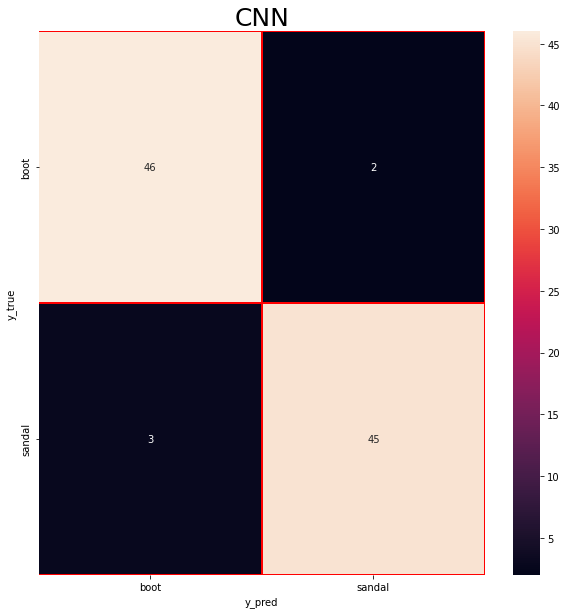

None


In [ ]:
print(confusion(test_dataset.labels, y_pred, "CNN"))

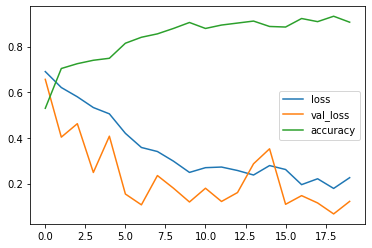

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

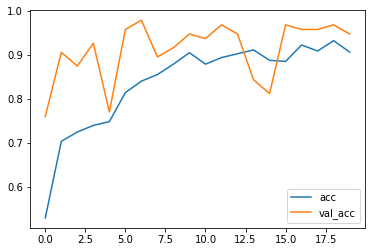

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

1/1 [==============================] - 0s 66ms/step
[[0.]]


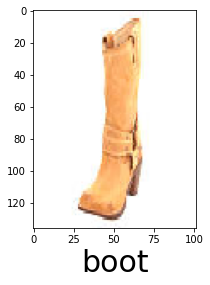

In [ ]:
predictImage(test_dir + "/boot/boot (432).jpg")

1/1 [==============================] - 0s 24ms/step
[[1.]]


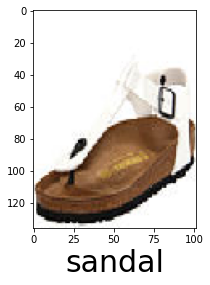

In [ ]:
predictImage(test_dir + "/sandal/Sandal (429).jpg")

1/1 [==============================] - 0s 35ms/step
[[0.]]


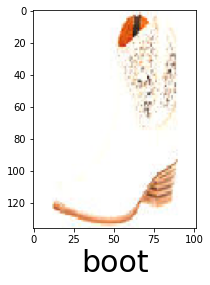

In [ ]:
predictImage(test_dir + "/boot/boot (448).jpg")

1/1 [==============================] - 0s 22ms/step
[[1.]]


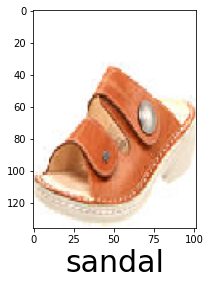

In [ ]:
predictImage(test_dir + "/sandal/Sandal (439).jpg")

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

VGG 19 IMPLEMENTATION

In [ ]:
class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu', input_shape= input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(1000, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.003),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
model = VGG19((136, 102, 3))

In [ ]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, loss_weights=0.3, metrics=['accuracy'])
model.fit(train_dataset,epochs=30,validation_data = test_dataset)

Epoch 1/30
26/26 [==============================] - 11s 266ms/step - loss: 22.1613 - accuracy: 0.4664 - val_loss: 0.2324 - val_accuracy: 0.5000
Epoch 2/30
26/26 [==============================] - 5s 195ms/step - loss: 0.2442 - accuracy: 0.5037 - val_loss: 0.2091 - val_accuracy: 0.5000
Epoch 3/30
26/26 [==============================] - 5s 195ms/step - loss: 0.2163 - accuracy: 0.4988 - val_loss: 0.2147 - val_accuracy: 0.5000
Epoch 4/30
26/26 [==============================] - 5s 197ms/step - loss: 0.2172 - accuracy: 0.4789 - val_loss: 0.2098 - val_accuracy: 0.5000
Epoch 5/30
26/26 [==============================] - 5s 196ms/step - loss: 0.2160 - accuracy: 0.4888 - val_loss: 0.2087 - val_accuracy: 0.5000
Epoch 6/30
26/26 [==============================] - 5s 199ms/step - loss: 0.2122 - accuracy: 0.5062 - val_loss: 0.2130 - val_accuracy: 0.5000
Epoch 7/30
26/26 [==============================] - 7s 249ms/step - loss: 0.2139 - accuracy: 0.5000 - val_loss: 0.2082 - val_accuracy: 0.5000
Epoc

In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 136, 102, 64)      1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 136, 102, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 68, 51, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 68, 51, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 68, 51, 128)       147584    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 34, 25, 128)      0         
 2D)                                                         

In [ ]:
IMG_SHAPE = target_size + (3,)
base_model = tf.keras.applications.VGG19(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

80134624/80134624 [==============================] - 4s 0us/step


**Feature extraction**

In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 4, 3, 512)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 136, 102, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 136, 102, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 136, 102, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 68, 51, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 68, 51, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 68, 51, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 34, 25, 128)       0     

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
preprocess_input = tf.keras.applications.vgg19.preprocess_input

In [ ]:
inputs = tf.keras.Input(shape = (136, 102, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = base_learning_rate),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 136, 102, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 136, 102, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 136, 102, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 136, 102, 3)      0         
                                                                 
 vgg19 (Functional)          (None, 4, 3, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                      

In [ ]:
history = model.fit(train_dataset,
                    epochs = 10,
                    validation_data = test_dataset)

Epoch 1/10
26/26 [==============================] - 5s 185ms/step - loss: 0.7429 - accuracy: 0.4876 - val_loss: 0.6836 - val_accuracy: 0.5000
Epoch 2/10
26/26 [==============================] - 5s 181ms/step - loss: 0.7276 - accuracy: 0.5087 - val_loss: 0.6834 - val_accuracy: 0.5000
Epoch 3/10
26/26 [==============================] - 5s 178ms/step - loss: 0.7543 - accuracy: 0.4913 - val_loss: 0.6838 - val_accuracy: 0.5000
Epoch 4/10
26/26 [==============================] - 5s 185ms/step - loss: 0.7307 - accuracy: 0.5199 - val_loss: 0.6832 - val_accuracy: 0.5000
Epoch 5/10
26/26 [==============================] - 5s 179ms/step - loss: 0.7581 - accuracy: 0.4614 - val_loss: 0.6832 - val_accuracy: 0.5000
Epoch 6/10
26/26 [==============================] - 5s 180ms/step - loss: 0.7494 - accuracy: 0.4813 - val_loss: 0.6832 - val_accuracy: 0.5000
Epoch 7/10
26/26 [==============================] - 5s 182ms/step - loss: 0.7382 - accuracy: 0.4876 - val_loss: 0.6831 - val_accuracy: 0.5000
Epoch 

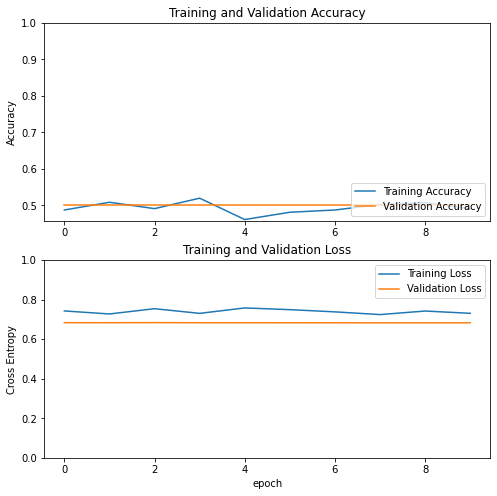

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

**Fine** **tuning**

In [ ]:
base_model.trainable = True

In [ ]:
# how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# fine-tune from this layer onwards
fine_tune_at = 100

# freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  22


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 136, 102, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 136, 102, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 136, 102, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 136, 102, 3)      0         
                                                                 
 vgg19 (Functional)          (None, 4, 3, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                      

In [ ]:
fine_tune_epochs = 10
total_epochs =  10 + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset)

Epoch 10/20
26/26 [==============================] - 6s 191ms/step - loss: 0.7220 - accuracy: 0.5174 - val_loss: 0.6829 - val_accuracy: 0.5000
Epoch 11/20
26/26 [==============================] - 5s 174ms/step - loss: 0.7288 - accuracy: 0.5162 - val_loss: 0.6829 - val_accuracy: 0.5000
Epoch 12/20
26/26 [==============================] - 5s 173ms/step - loss: 0.7332 - accuracy: 0.4950 - val_loss: 0.6829 - val_accuracy: 0.5000
Epoch 13/20
26/26 [==============================] - 5s 174ms/step - loss: 0.7362 - accuracy: 0.5149 - val_loss: 0.6829 - val_accuracy: 0.5000
Epoch 14/20
26/26 [==============================] - 5s 176ms/step - loss: 0.7448 - accuracy: 0.4888 - val_loss: 0.6829 - val_accuracy: 0.5000
Epoch 15/20
26/26 [==============================] - 5s 175ms/step - loss: 0.7346 - accuracy: 0.5025 - val_loss: 0.6829 - val_accuracy: 0.5000
Epoch 16/20
26/26 [==============================] - 5s 176ms/step - loss: 0.7141 - accuracy: 0.5124 - val_loss: 0.6829 - val_accuracy: 0.5000

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

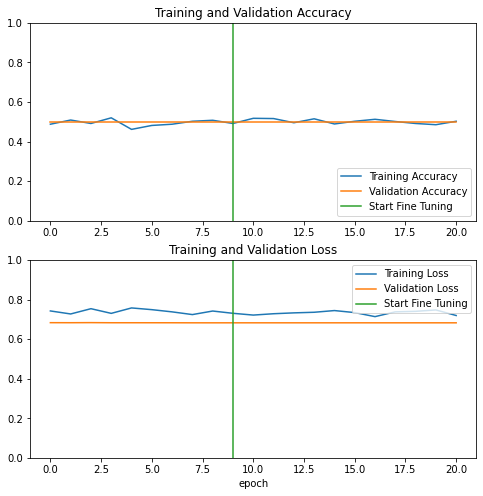

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([10-1,10-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([10-1,10-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

3/3 [==============================] - 0s 77ms/step - loss: 0.6829 - accuracy: 0.5000
Test accuracy : 0.5
